In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functions import get_datasets, get_target_id
import glob
import os
from q_value_calc_crosslinks import calcQ

In [101]:
i = 5
dataset = get_datasets()

In [102]:
input_file_original = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_filtered.pkl"
input_file_svm = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_SVM_iter"
input_file_perc = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_{dataset[i]['comparison']}_filtered.pkl"


In [ ]:
svm_files = [filename for filename in os.listdir(f"../data/{dataset[i]['type']}") if filename.startswith(f"{dataset[i]['file']}_SVM_filtered_iter")]

In [107]:
# read original dataframes
df_original = pd.read_pickle(input_file_original)
dfs_svm = []
for svm_file in svm_files:
    dfs_svm.append(pd.read_pickle(f"../data/{dataset[i]['type']}/{svm_file}"))
for df_svm in dfs_svm:
    df_svm.sort_values('Score',ascending=False, inplace=True)
    display(df_svm.loc[:,'class-specific_q-val'])
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

KeyError: 'class-specific_q-val'

KeyError: 'class-specific_q-val'

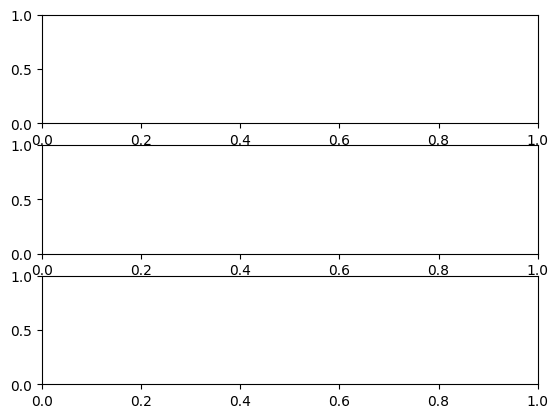

In [105]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,5)))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"svm iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
#plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
not_reranked_file = f"../data/{dataset[i]['type']}/{dataset[i]['file']}_SVM_filtered_no_rerank_iter_1.pkl"
df_not_reranked = pd.read_pickle(not_reranked_file)

FileNotFoundError: [Errno 2] No such file or directory: '../data/top_down_data/outprsm4_multihits_SVM_filtered_no_rerank_iter_1.pkl'

KeyError: 'ModCount'

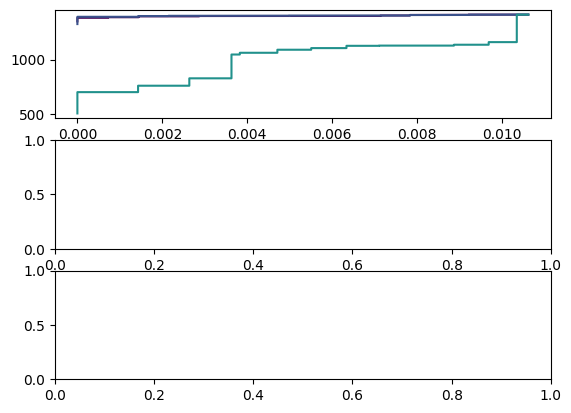

In [ ]:
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    df_svm = dfs_svm[0]
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"original")
    axs[j].step(df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=all")
    axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=1")
    axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"percolator")
    axs[j].set_xlim(0,0.1)
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title(f"Peptides")
axs[1].set_title(f"XL")
fig.suptitle('Top=all vs. Top=1')
fig.tight_layout()
#plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

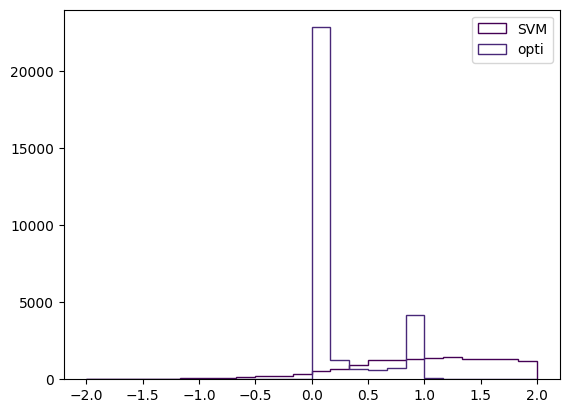

In [ ]:
bins = np.linspace(-2,2,25)
plt.hist(df_svm.loc[:, 'Score'], label = 'SVM', histtype='step', bins=bins)
plt.hist(df_perc.loc[:, 'Score'], label='opti', histtype='step', bins = bins)
plt.legend()
plt.show()

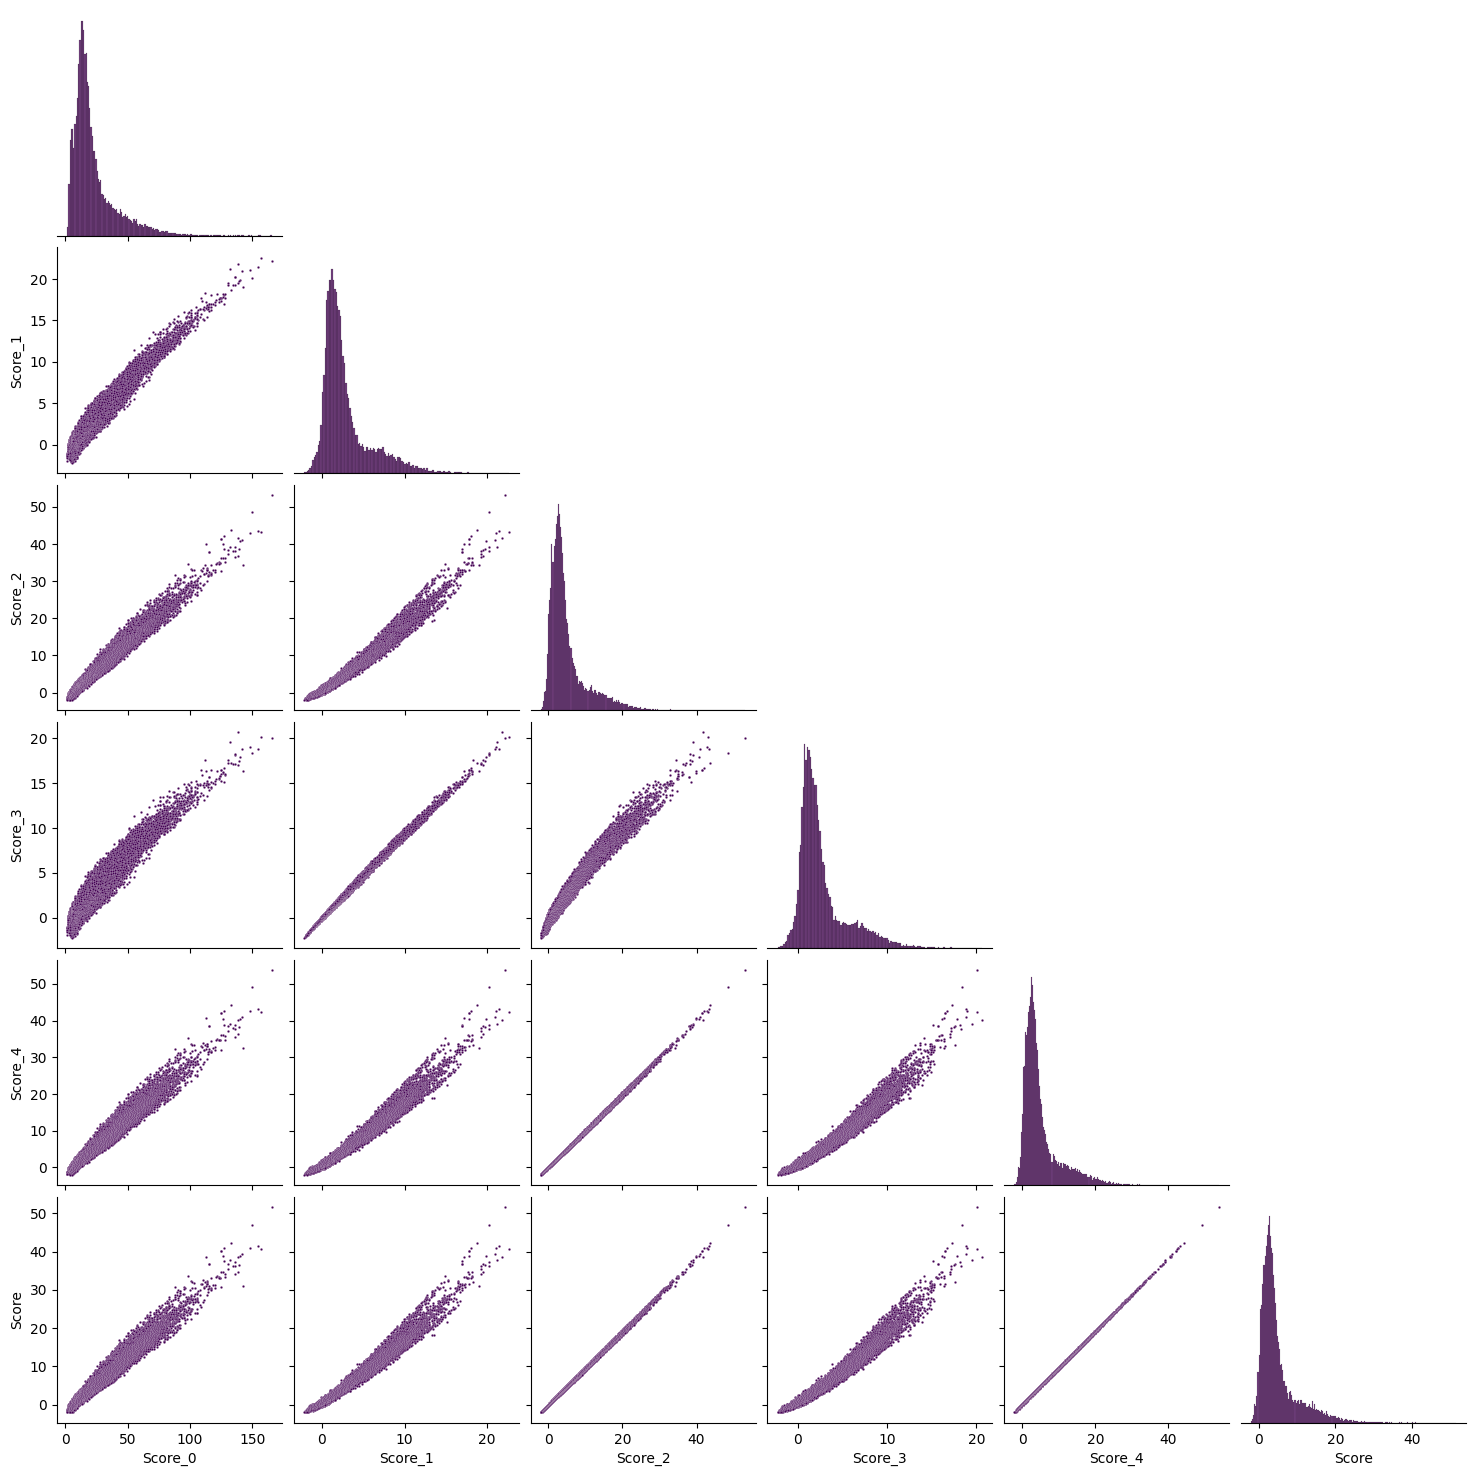

In [ ]:
import seaborn as sns
sns.pairplot(dfs_svm[len(dfs_svm) -1].loc[:,['Score_0', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score']], plot_kws={"s": 3}, corner=True)